# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [3]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [8]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [9]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
yearly_data = to_data.groupby("year").sum()
yearly_data.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [10]:
# Save the dataframe as a csv file
yearly_data.to_csv("yearly_data.csv") 

In [11]:
# Drop non-dwelling types in yearly_data
dwelling_data = yearly_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
dwelling_data.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [12]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    
    """
    return (data.hvplot.bar(
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel, 
        color=color, 
        rot=90, 
        height=500
    ))

<AxesSubplot:xlabel='year'>

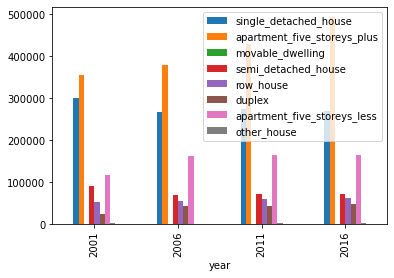

In [13]:
dwelling_data.plot.bar()

In [14]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
dwelling_2001 = create_bar_chart(
    dwelling_data.iloc[0],
    "2001 Toronto Dwellings", 
    "2001 Dwelling Types",
    "Units", 
    "red").opts(yformatter="%.0f")
dwelling_2001


:Bars   [index]   (2001)

In [15]:
# Bar chart for 2006
dwelling_2006 = create_bar_chart(
    dwelling_data.iloc[0],
    "2006 Toronto Dwellings", 
    "2006 - Dwelling Types",
    "Units", "green").opts(yformatter="%.0f")
dwelling_2006

:Bars   [index]   (2001)

In [16]:
# Bar chart for 2011
dwelling_2011 = create_bar_chart(
    dwelling_data.iloc[0],
    "2011 Toronto Dwellings", 
    "2011 - Dwelling Types",
    "Units", "yellow").opts(yformatter="%.0f")
dwelling_2011

:Bars   [index]   (2001)

In [17]:
# Bar chart for 2016
dwelling_2016 = create_bar_chart(
    dwelling_data.iloc[0],
    "2016 Toronto Dwellings", 
    "2016 - Dwelling Types",
    "Units", "orange").opts(yformatter="%.0f")
dwelling_2016

:Bars   [index]   (2001)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [18]:
# Calculate the average monthly shelter costs for owned and rented dwellings
ave_monthly_costs = yearly_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean()
ave_monthly_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,118563.0,152031.0
2006,184352.0,129558.0
2011,202750.0,142771.0
2016,246584.0,175885.0


In [19]:
# Helper create_line_chart function
## Function called create_line_chart
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    create_line_chart = data.hvplot.line(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=500)
    return (create_line_chart)

In [20]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
owned_plot = create_line_chart(ave_monthly_costs["shelter_costs_owned"],"Monthly Shelter Costs for Owned Dwellings in Toronto", "year", "Avg Costs", "red").opts(yformatter="%.0f")
owned_plot

:Curve   [year]   (shelter_costs_owned)

In [21]:
# owned_plot
rented_plot = create_line_chart(ave_monthly_costs["shelter_costs_rented"],"Average Monthly Shelter Cost for Rented Dwellings in Toronto", "year", "Avg Costs", "cyan").opts(yformatter="%.0f")
rented_plot

:Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [22]:
# Calculate the average house value per year
average_house_value = yearly_data[["average_house_value"]]
average_house_value.hvplot.bar().opts(yformatter="%.0f")


:Bars   [year]   (average_house_value)

In [23]:
# Plot the average house value per year as a line chart
average_house_value.hvplot.line().opts(yformatter="%.0f")


:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [24]:
# Create a new DataFrame with the mean house values by neighbourhood per year
drop_data = to_data.drop(columns=["single_detached_house", "apartment_five_storeys_plus", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "shelter_costs_owned", "shelter_costs_rented", "other_house"])
ave_house_val_df = drop_data.groupby(["year", "neighbourhood", "average_house_value"]).mean()
ave_house_val_df.head()

Empty DataFrame
Columns: []
Index: [(2001, Agincourt North, 200388), (2001, Agincourt South-Malvern West, 203047), (2001, Alderwood, 259998), (2001, Annex, 453850), (2001, Banbury-Don Mills, 371864)]

In [25]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
ave_house_val_plot = ave_house_val_df.hvplot.line(x="year", y="average_house_value", groupby="neighbourhood").opts(yformatter="%.0f")
ave_house_val_plot

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [26]:
# Fetch the data of all dwelling types per year
num_dwelling_types = to_data.drop(columns=["average_house_value","shelter_costs_owned","shelter_costs_rented"])
num_dwelling_types

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0


In [27]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
num_dwelling_types.hvplot.bar(x="year", groupby="neighbourhood", rot=90, height=500).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [28]:
# Getting the data from the top 10 expensive neighbourhoods
top_ten_exp = to_data.groupby(["neighbourhood"]).mean()
top_ten_exp = top_ten_exp.sort_values(by="average_house_value", ascending=False)
plot_top_ten = top_ten_exp.head(10)

In [29]:
# Plotting the data from the top 10 expensive neighbourhoods
plot_top_ten.hvplot.bar(x="neighbourhood", y="average_house_value", height=500, rot=90, ylim=(0, 2000000)).opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [30]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [31]:
# Calculate the mean values for each neighborhood
neighbourhood_mean = to_data.groupby("neighbourhood").mean()
neighbourhood_mean.reset_index(inplace=True)
neighbourhood_mean

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


In [32]:
# Join the average values with the neighbourhood locations
df_all_neighbourhoods = pd.merge(
    df_neighbourhood_locations, neighbourhood_mean, on="neighbourhood"
)
df_all_neighbourhoods.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [34]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot = px.scatter_mapbox(
    df_all_neighbourhoods,
    lat="lat",
    lon="lon",
    color="average_house_value",
    title ="Toronto Average House Values",
    mapbox_style="open-street-map")

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [35]:
# Create a bar chart row facet to plot the above data
reset_to_data = to_data.reset_index()
ave_house_val = reset_to_data.rename({"average_house_value":"Avg. House Value"}, axis=1)
ave_house_val.head(10)

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,Avg. House Value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
5,2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
6,2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
7,2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
8,2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491


In [36]:
# Creating bar chart row facet to plot
fig = px.bar(
    ave_house_val,
    x="neighbourhood",
    y="Avg. House Value",
    color="Avg. House Value",
    facet_row="year",
    title="Average House Values in Toronto per Neighbourhood",
    width=1200,
    height=1200)
fig

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [37]:
# Fetch the data from all expensive neighbourhoods per year.
df_expensive_neighbourhoods_per_year = to_data.sort_values(by=["average_house_value", "year"])
df_expensive_neighbourhoods_per_year

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Flemingdon Park,15,6265,0,180,805,0,480,0,126255,774,966
2001,Taylor-Massey,675,4930,0,250,290,95,110,5,145464,732,908
2001,Mount Olive-Silverstone-Jamestown,1945,5865,5,225,1000,320,240,5,153829,765,929
2001,Thorncliffe Park,15,6275,0,0,75,0,0,20,155094,876,1042
2001,Malvern,4285,2815,0,1430,3075,230,110,45,156076,796,988
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486


In [38]:
# Create the sunburst chart
exp_sunburst =px.sunburst(
    df_expensive_neighbourhoods_per_year,
    path=["neighbourhood"],
    values="average_house_value",
    color='shelter_costs_owned',
    title="Costs of Most Expensive Neighbourhoods in Toronto per Year",
    height=700
)
exp_sunburst.show()